# **Build Linear Regression Model in Python**

Chanin Nantasenamat

[*'Data Professor' YouTube channel*](http://youtube.com/dataprofessor)

In this Jupyter notebook, I will be showing you how to build a linear regression model in Python using the scikit-learn package.

Inspired by [scikit-learn's Linear Regression Example](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html)

---

## **Load the Diabetes dataset** (via scikit-learn)

### **Import library**

In [ ]:
from sklearn import datasets

### **Load dataset**

In [ ]:
diabetes = datasets.load_diabetes()

In [8]:
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

### **Description of the Diabetes dataset**

In [9]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

### **Feature names**

In [10]:
print(diabetes.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


### **Create X and Y data matrices**

In [11]:
X = diabetes.data
Y = diabetes.target

In [12]:
X.shape, Y.shape

((442, 10), (442,))

### **Load dataset + Create X and Y data matrices (in 1 step)**

In [13]:
X, Y = datasets.load_diabetes(return_X_y=True)

In [14]:
X.shape, Y.shape

((442, 10), (442,))

## **Load the Boston Housing dataset (via GitHub)**

The Boston Housing dataset was obtained from the mlbench R package, which was loaded using the following commands:

```
library(mlbench)
data(BostonHousing)
```

For your convenience, I have also shared the [Boston Housing dataset](https://github.com/dataprofessor/data/blob/master/BostonHousing.csv) on the Data Professor GitHub package.

### **Import library**

In [ ]:
import pandas as pd

### **Download CSV from GitHub**

In [ ]:
! wget https://github.com/dataprofessor/data/raw/master/BostonHousing.csv

### **Read in CSV file**

In [ ]:
BostonHousing = pd.read_csv("BostonHousing.csv")
BostonHousing

### **Split dataset to X and Y variables**

In [ ]:
Y = BostonHousing.medv
Y

In [ ]:
X = BostonHousing.drop(['medv'], axis=1)
X

## **Data split**

### **Import library**

In [15]:
from sklearn.model_selection import train_test_split

### **Perform 80/20 Data split**

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

### **Data dimension**

In [17]:
X_train.shape, Y_train.shape

((353, 10), (353,))

In [18]:
X_test.shape, Y_test.shape

((89, 10), (89,))

## **Linear Regression Model**

### **Import library**

In [19]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

### **Build linear regression**

#### Defines the regression model

In [20]:
model = linear_model.LinearRegression()

#### Build training model

In [21]:
model.fit(X_train, Y_train)

LinearRegression()

#### Apply trained model to make prediction (on test set)

In [22]:
Y_pred = model.predict(X_test)

## **Prediction results**

### **Print model performance**

In [23]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred))

Coefficients: [  41.0998627  -226.48187182  435.57649489  282.1520669  -926.06684926
  641.2087921   129.58674913  132.69858581  858.1508098    52.4845883 ]
Intercept: 150.93266152112082
Mean squared error (MSE): 2840.13
Coefficient of determination (R^2): 0.59


### **String formatting**

By default r2_score returns a floating number ([more details](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.types.html))

In [24]:
r2_score(Y_test, Y_pred)

0.5897253280110017

In [25]:
r2_score(Y_test, Y_pred).dtype

dtype('float64')

We will be using the modulo operator to format the numbers by rounding it off.

In [26]:
'%f' % 0.523810833536016

'0.523811'

We will now round it off to 3 digits

In [27]:
'%.3f' % 0.523810833536016

'0.524'

We will now round it off to 2 digits

In [28]:
'%.2f' % 0.523810833536016

'0.52'

## **Scatter plots**

### **Import library**

In [29]:
import seaborn as sns

### **Make scatter plot**

#### The Data

In [30]:
Y_test

array([217.,  84., 136.,  65.,  90., 164., 182., 178., 212.,  65., 201.,
       115.,  47.,  55.,  90., 128., 131.,  39.,  85., 268.,  90., 263.,
        55., 310., 275.,  97., 346., 144., 141., 202., 195., 208., 244.,
        96.,  89.,  71., 118.,  59., 259., 121., 187.,  88., 277., 141.,
       147., 272.,  57., 257.,  45.,  43.,  52., 191., 164., 302.,  52.,
       283.,  54., 219.,  99., 167.,  77., 198., 178., 317., 341.,  81.,
        75.,  69., 206., 173.,  68., 283.,  53., 202., 179., 143., 272.,
        68., 142.,  66., 137.,  67.,  42.,  49., 265., 197., 151., 116.,
       102.])

In [31]:
import numpy as np
np.array(Y_test)

array([217.,  84., 136.,  65.,  90., 164., 182., 178., 212.,  65., 201.,
       115.,  47.,  55.,  90., 128., 131.,  39.,  85., 268.,  90., 263.,
        55., 310., 275.,  97., 346., 144., 141., 202., 195., 208., 244.,
        96.,  89.,  71., 118.,  59., 259., 121., 187.,  88., 277., 141.,
       147., 272.,  57., 257.,  45.,  43.,  52., 191., 164., 302.,  52.,
       283.,  54., 219.,  99., 167.,  77., 198., 178., 317., 341.,  81.,
        75.,  69., 206., 173.,  68., 283.,  53., 202., 179., 143., 272.,
        68., 142.,  66., 137.,  67.,  42.,  49., 265., 197., 151., 116.,
       102.])

In [33]:
Y_pred

array([180.11925473,  89.36723099, 142.60977179,  56.73222745,
       182.69869261, 189.6517648 , 112.40689911, 132.84953061,
       193.79633907, 124.65144588,  82.20943374, 146.91659456,
       102.13801373,  40.08243594, 142.14141461, 102.80822248,
       173.09535277,  55.10203757, 149.75869938, 220.88877261,
       140.65559743, 177.1296949 ,  72.57232034, 250.4655288 ,
       229.26651725, 101.89099321, 253.17374642, 118.56838547,
       160.48576439, 185.81145908, 229.60986933, 227.86911192,
       172.94837508,  91.60647588, 120.59879846, 123.08505372,
        96.59423524, 122.23594227, 222.86733818, 163.92543328,
       129.4818231 , 112.37421429, 246.5098733 , 177.58223917,
       169.52538773, 234.39573095,  58.4971288 , 211.68877398,
        29.07808208,  52.69610264,  55.78317877, 123.64439105,
       184.2523818 , 144.38523828,  61.46748988, 185.94324181,
        96.59924057, 137.98393864,  51.19497972, 180.09692512,
        82.35366018, 185.79283999, 120.7750839 , 224.92

#### Making the scatter plot

<Axes: >

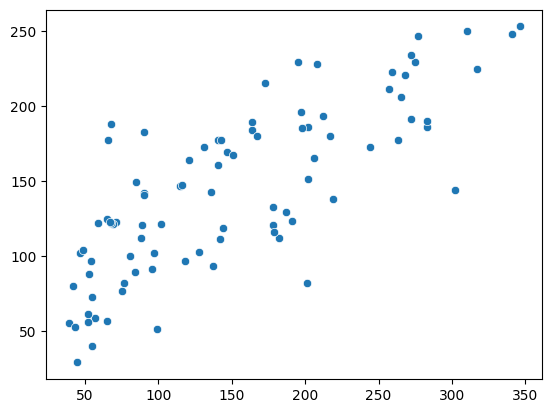

In [44]:
sns.scatterplot(x = Y_test, y = Y_pred)

<Axes: >

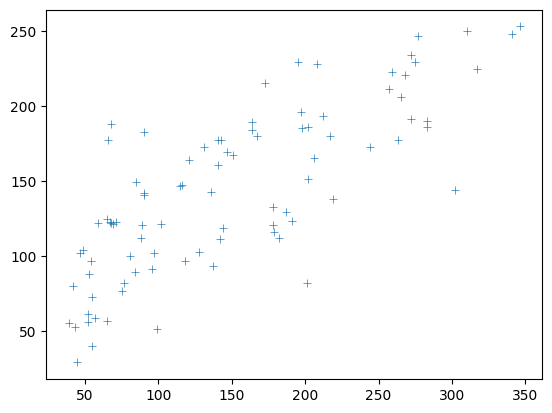

In [45]:
sns.scatterplot(x = Y_test, y= Y_pred, marker="+")

<Axes: >

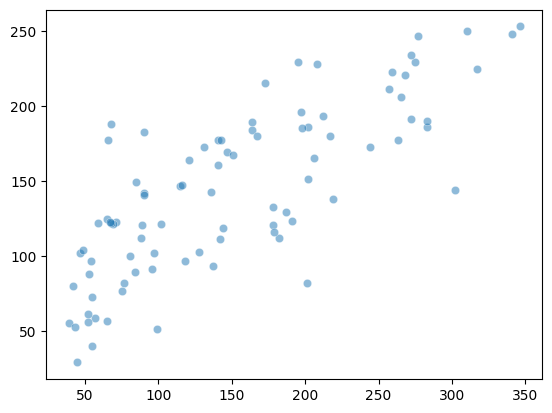

In [46]:
sns.scatterplot(x = Y_test, y = Y_pred, alpha=0.5)